In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [23]:
df_supply= pd.read_csv('SupplyChain.csv')
df_supply

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [24]:
df_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

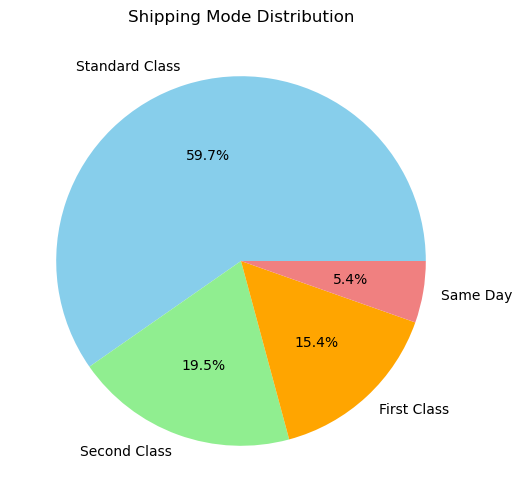

In [25]:
# Shipping Mode Analysis (Pie Chart)
plt.figure(figsize=(8, 6))
df_supply['Shipping Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Shipping Mode Distribution')
plt.ylabel('')
plt.show()

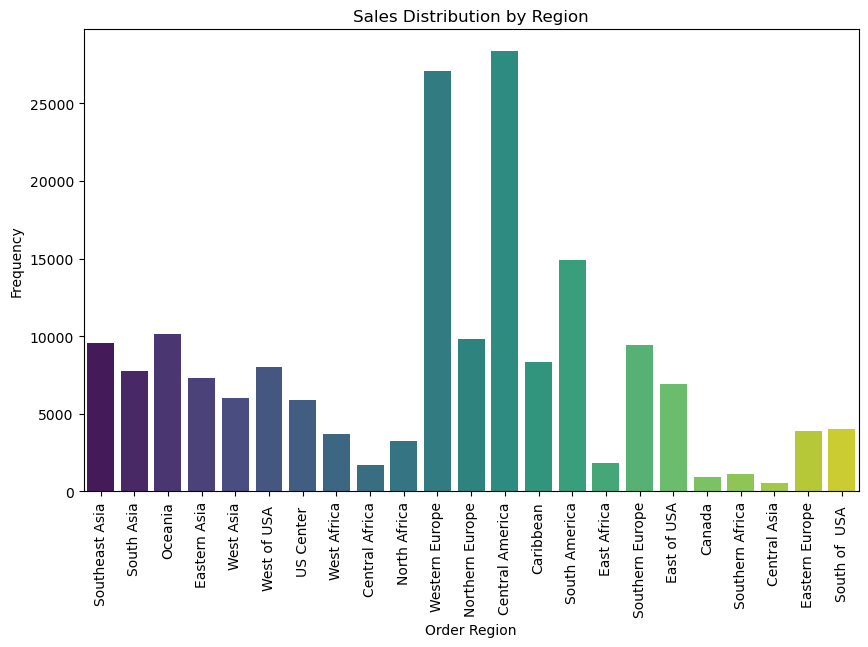

<Figure size 640x480 with 0 Axes>

In [26]:
# Sales Distribution by Region (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_supply, x='Order Region', palette='viridis')
plt.title('Sales Distribution by Region')
plt.xlabel('Order Region')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()
plt.savefig('Sales Distribution by Region.png')

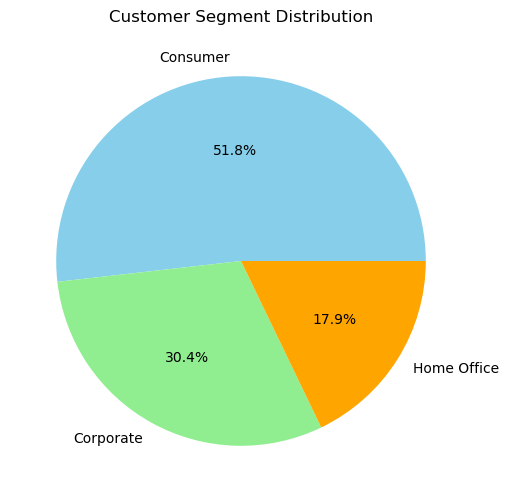

<Figure size 640x480 with 0 Axes>

In [27]:
# Customer Segment Analysis (Pie Chart)
plt.figure(figsize=(8, 6))
df_supply['Customer Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange'])
plt.title('Customer Segment Distribution')
plt.ylabel('')
plt.show()
plt.savefig('Customer Segment Distribution.png')

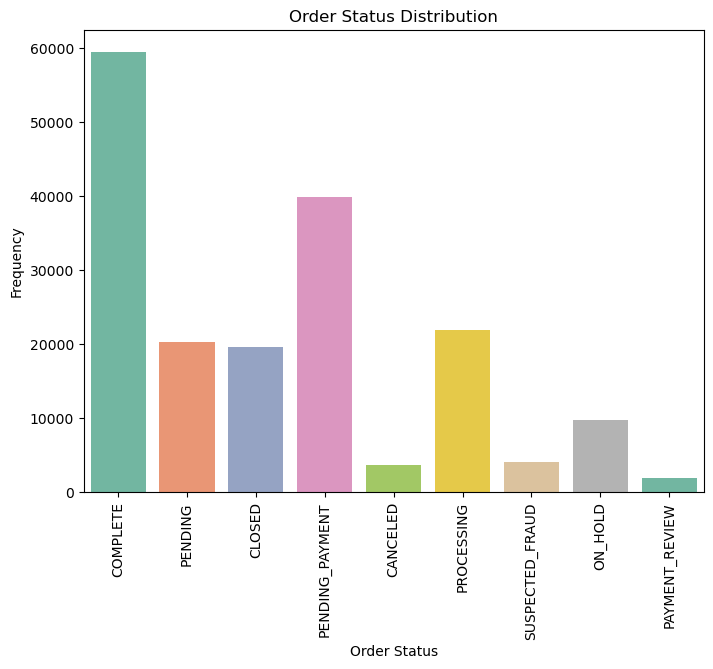

In [28]:
# Order Status Analysis (Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_supply, x='Order Status', palette='Set2')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

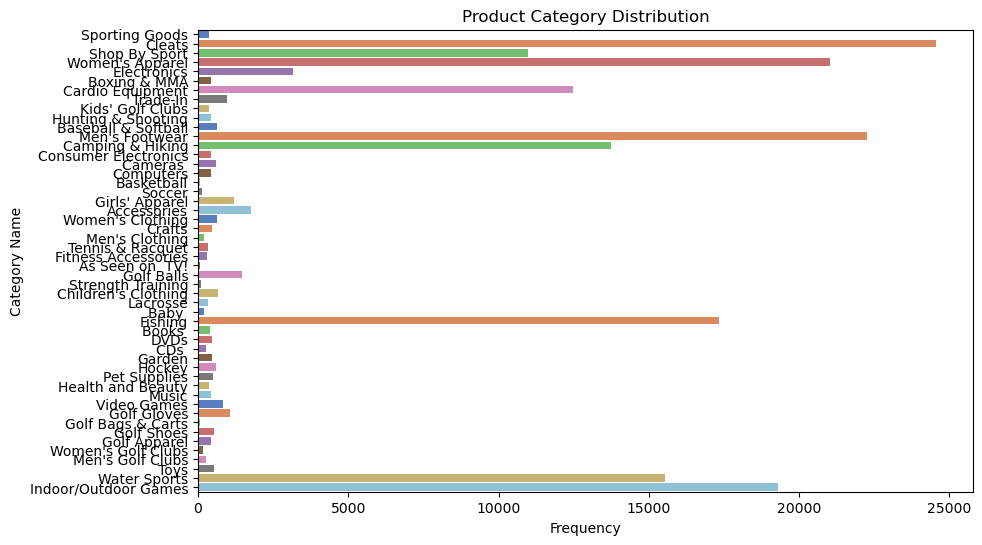

In [29]:
# Product Category Analysis (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_supply, y='Category Name', palette='muted')
plt.title('Product Category Distribution')
plt.xlabel('Frequency')
plt.ylabel('Category Name')
plt.show()

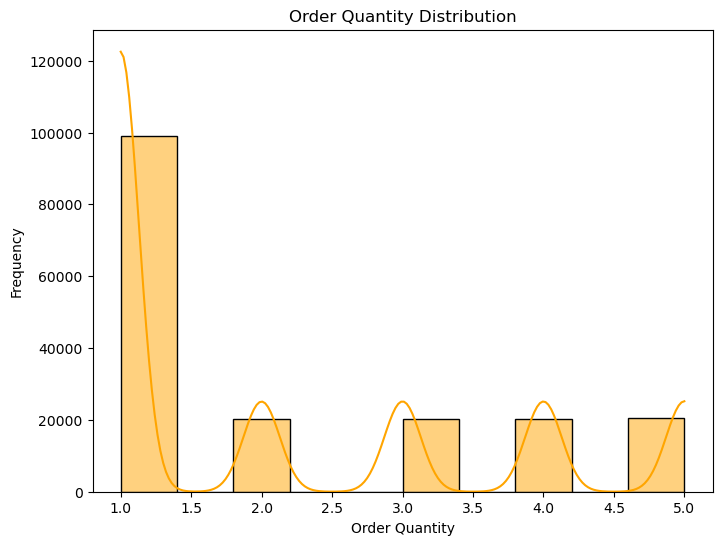

<Figure size 640x480 with 0 Axes>

In [30]:
# Order Quantity Analysis (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(df_supply['Order Item Quantity'], bins=10, kde=True, color='orange')
plt.title('Order Quantity Distribution')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Order Quantity Distribution.png')

In [31]:
df_supply= df_supply.drop(['Delivery Status','Product Description','Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'shipping date (DateOrders)', 'Customer Password', 'Customer Segment',  'Order Profit Per Order','Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'order date (DateOrders)',
       'Order Item Product Price', 'Order Region', 'Market', 'Order Item Profit Ratio','Product Card Id', 'Product Category Id',
       'Product Description', 'Product Image', 'Benefit per order', 'Category Id', 'Order Status', 'Product Status', 'Order Item Total','Department Id',
       'Department Name', 'Order Id', 'Order Region', 'Order Customer Id', 'Order Zipcode','Days for shipping (real)', 'Sales per customer', 'Category Name', 'Customer City', 'Customer Country', 'Customer State',
       'Customer Street', 'Product Name'], axis=1)

In [32]:
df_supply

,Type,Days for shipment (scheduled),Late_delivery_risk,Customer Zipcode,Latitude,Longitude,Order City,Order Country,Order Item Quantity,Sales,Order State,Product Price,Shipping Mode
0,DEBIT,4,0,725.0,18.251453,-66.037056,Bekasi,Indonesia,1,327.750000,Java Occidental,327.750000,Standard Class
1,TRANSFER,4,1,725.0,18.279451,-66.037064,Bikaner,India,1,327.750000,Rajastán,327.750000,Standard Class
2,CASH,4,0,95125.0,37.292233,-121.881279,Bikaner,India,1,327.750000,Rajastán,327.750000,Standard Class
3,DEBIT,4,0,90027.0,34.125946,-118.291016,Townsville,Australia,1,327.750000,Queensland,327.750000,Standard Class
4,PAYMENT,4,0,725.0,18.253769,-66.037048,Townsville,Australia,1,327.750000,Queensland,327.750000,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,0,11207.0,40.640930,-73.942711,Shanghái,China,1,399.980011,Shanghái,399.980011,Standard Class
180515,DEBIT,2,1,93304.0,35.362545,-119.018700,Hirakata,Japón,1,399.980011,Osaka,399.980011,Second Class
180516,TRANSFER,4,1,6010.0,41.629959,-72.967155,Adelaide,Australia,1,399.980011,Australia del Sur,399.980011,Standard Class
180517,PAYMENT,4,0,725.0,18.213350,-66.370575,Adelaide,Australia,1,399.980011,Australia del Sur,399.980011,Standard Class


In [34]:
df_supply['Shipping Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [12]:
df_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Late_delivery_risk             180519 non-null  int64  
 3   Customer Zipcode               180516 non-null  float64
 4   Latitude                       180519 non-null  float64
 5   Longitude                      180519 non-null  float64
 6   Order City                     180519 non-null  object 
 7   Order Country                  180519 non-null  object 
 8   Order Item Quantity            180519 non-null  int64  
 9   Sales                          180519 non-null  float64
 10  Order State                    180519 non-null  object 
 11  Product Price                  180519 non-null  float64
 12  Shipping Mode                 

In [13]:
le= LabelEncoder()

In [14]:
df_supply['Order Country']= le.fit_transform(df_supply['Order Country'])

In [15]:
df_supply['Order City']= le.fit_transform(df_supply['Order City'])

In [16]:
df_supply['Order State']= le.fit_transform(df_supply['Order State'])

In [17]:
df_supply

,Type,Days for shipment (scheduled),Late_delivery_risk,Customer Zipcode,Latitude,Longitude,Order City,Order Country,Order Item Quantity,Sales,Order State,Product Price,Shipping Mode
0,DEBIT,4,0,725.0,18.251453,-66.037056,331,70,1,327.750000,475,327.750000,Standard Class
1,TRANSFER,4,1,725.0,18.279451,-66.037064,391,69,1,327.750000,841,327.750000,Standard Class
2,CASH,4,0,95125.0,37.292233,-121.881279,391,69,1,327.750000,841,327.750000,Standard Class
3,DEBIT,4,0,90027.0,34.125946,-118.291016,3226,8,1,327.750000,835,327.750000,Standard Class
4,PAYMENT,4,0,725.0,18.253769,-66.037048,3226,8,1,327.750000,835,327.750000,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,0,11207.0,40.640930,-73.942711,2922,31,1,399.980011,913,399.980011,Standard Class
180515,DEBIT,2,1,93304.0,35.362545,-119.018700,1362,77,1,399.980011,770,399.980011,Second Class
180516,TRANSFER,4,1,6010.0,41.629959,-72.967155,25,8,1,399.980011,88,399.980011,Standard Class
180517,PAYMENT,4,0,725.0,18.213350,-66.370575,25,8,1,399.980011,88,399.980011,Standard Class


In [18]:
df_supply.isnull().sum()

Type                             0
Days for shipment (scheduled)    0
Late_delivery_risk               0
Customer Zipcode                 3
Latitude                         0
Longitude                        0
Order City                       0
Order Country                    0
Order Item Quantity              0
Sales                            0
Order State                      0
Product Price                    0
Shipping Mode                    0
dtype: int64

In [19]:
df_supply= df_supply.dropna()

In [20]:
df_supply.isnull().sum()

Type                             0
Days for shipment (scheduled)    0
Late_delivery_risk               0
Customer Zipcode                 0
Latitude                         0
Longitude                        0
Order City                       0
Order Country                    0
Order Item Quantity              0
Sales                            0
Order State                      0
Product Price                    0
Shipping Mode                    0
dtype: int64

In [21]:
df_supply= pd.get_dummies(df_supply)

In [ ]:
X= df_supply.drop('Late_delivery_risk', axis=1)
y= df_supply['Late_delivery_risk']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Assuming X contains features and y contains the target variable

# Define different sets of hyperparameters
param_sets = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5},
    {'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 7}
]

# Perform k-fold cross-validation for each set of hyperparameters
for i, params in enumerate(param_sets, start=1):
    print(f"Model {i} Hyperparameters: {params}")
    
    # Initialize the Gradient Boosting classifier with the current set of hyperparameters
    gb_classifier = GradientBoostingClassifier(**params, random_state=42)
    
    # Perform k-fold cross-validation with k=5
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(gb_classifier, X, y, cv=kfold, scoring='accuracy')
    
    # Print the cross-validation scores
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Accuracy: {cv_scores.mean():.4f}\n")

Model 1 Hyperparameters: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}
Cross-Validation Scores: [0.69845446 0.69179847 0.69653491 0.69789214 0.70268399]
Mean Accuracy: 0.6975

Model 2 Hyperparameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5}
Cross-Validation Scores: [0.70324618 0.69805833 0.70232391 0.70398582 0.70703266]
Mean Accuracy: 0.7029

Model 3 Hyperparameters: {'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 7}
Cross-Validation Scores: [0.70709617 0.70027422 0.70553694 0.70592472 0.71063347]
Mean Accuracy: 0.7059



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(n_estimators= 300, learning_rate= 0.01, max_depth= 7)

# Train the Gradient Boosting model
gbm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = gbm_model.predict(X_test)

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred)
conf_matrix_gbm = confusion_matrix(y_test, y_pred)
class_report_gbm = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_gbm)
print("Confusion Matrix:\n", conf_matrix_gbm)
print("Classification Report:\n", class_report_gbm)

Accuracy: 0.7070961666297363
Confusion Matrix:
 [[14211  2091]
 [ 8484 11318]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.87      0.73     16302
           1       0.84      0.57      0.68     19802

    accuracy                           0.71     36104
   macro avg       0.74      0.72      0.71     36104
weighted avg       0.75      0.71      0.70     36104



# Random Forest

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming X contains features and y contains the target variable

# Define different sets of hyperparameters
param_sets = [
    {'n_estimators': 100, 'max_depth': None},
    {'n_estimators': 200, 'max_depth': 10},
    {'n_estimators': 300, 'max_depth': 20}
]

# Perform k-fold cross-validation for each set of hyperparameters
for i, params in enumerate(param_sets, start=1):
    print(f"Model {i} Hyperparameters: {params}")
    
    # Initialize the Random Forest classifier with the current set of hyperparameters
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    
    # Perform k-fold cross-validation with k=5
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(rf_classifier, X, y, cv=kfold, scoring='accuracy')
    
    # Print the cross-validation scores
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Accuracy: {cv_scores.mean():.4f}\n")

Model 1 Hyperparameters: {'n_estimators': 100, 'max_depth': None}
Cross-Validation Scores: [0.85154    0.85449963 0.85890369 0.85713099 0.85740797]
Mean Accuracy: 0.8559

Model 2 Hyperparameters: {'n_estimators': 200, 'max_depth': 10}
Cross-Validation Scores: [0.70440948 0.69819683 0.70285018 0.70451209 0.70952552]
Mean Accuracy: 0.7039

Model 3 Hyperparameters: {'n_estimators': 300, 'max_depth': 20}
Cross-Validation Scores: [0.76016508 0.75101792 0.76068471 0.76121098 0.76198654]
Mean Accuracy: 0.7590



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)
class_report_rf = classification_report(y_test, y_pred)

print(accuracy_rf)
print(conf_matrix_rf)
print(class_report_rf)

0.853007976955462
[[14568  1734]
 [ 3573 16229]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.85     16302
           1       0.90      0.82      0.86     19802

    accuracy                           0.85     36104
   macro avg       0.85      0.86      0.85     36104
weighted avg       0.86      0.85      0.85     36104



In [ ]:
import pickle

supply_chain_model= pickle.dump('rf_model', open('supply_model_1.pkl', 'wb'))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd645cac-d9a0-4bab-87f0-916c90edd13d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>